### Comparison of performance of different Classification algorithms

A comparison of baseline Classification models without any hyper-parameter tuning against three types of datasets:<br>
- linearly separable dataset
- spirally distributed dataset
- concentratic circularly distributed dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification, make_blobs
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
%matplotlib inline
from sklearn.metrics import roc_auc_score, auc, roc_curve
from sklearn.model_selection import cross_val_predict, cross_val_score

In [2]:
# 3 types of datasets
datasets = [make_moons(noise=0.2, random_state=0), # swirl distributed dataset
            make_circles(noise=0.2, factor=0.5, random_state=1), # concentric cirularly distributed dataset
            make_blobs(n_samples=100, centers=2, n_features=2) # gaussian distributed dataset
            ]

# name of classifiers
names = ["LogisticRegression","Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost","Naive Bayes", "QDA"]

# classifiers
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()
]

ROC Curve on Validation Dataset with AUC score


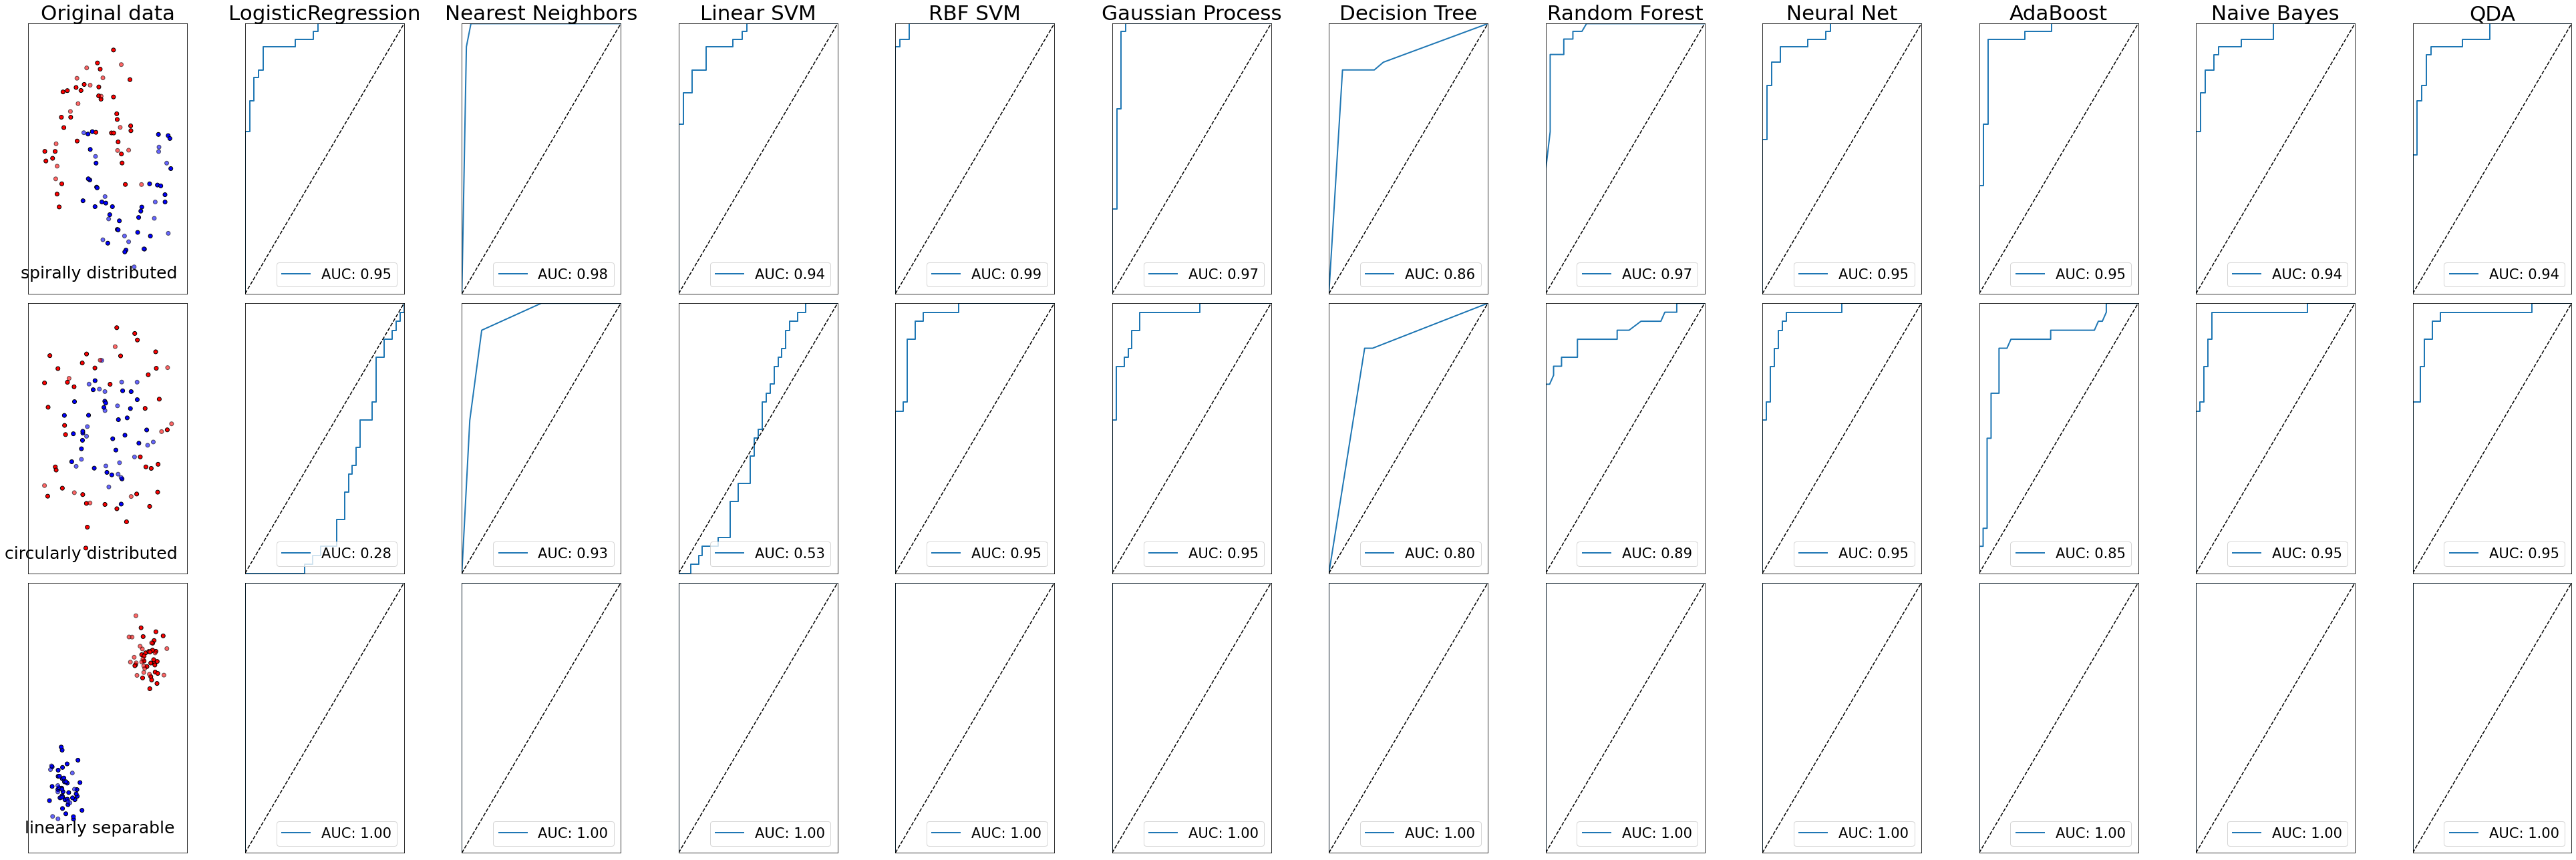

Decision Boundaries on Testing dataset with their scores.


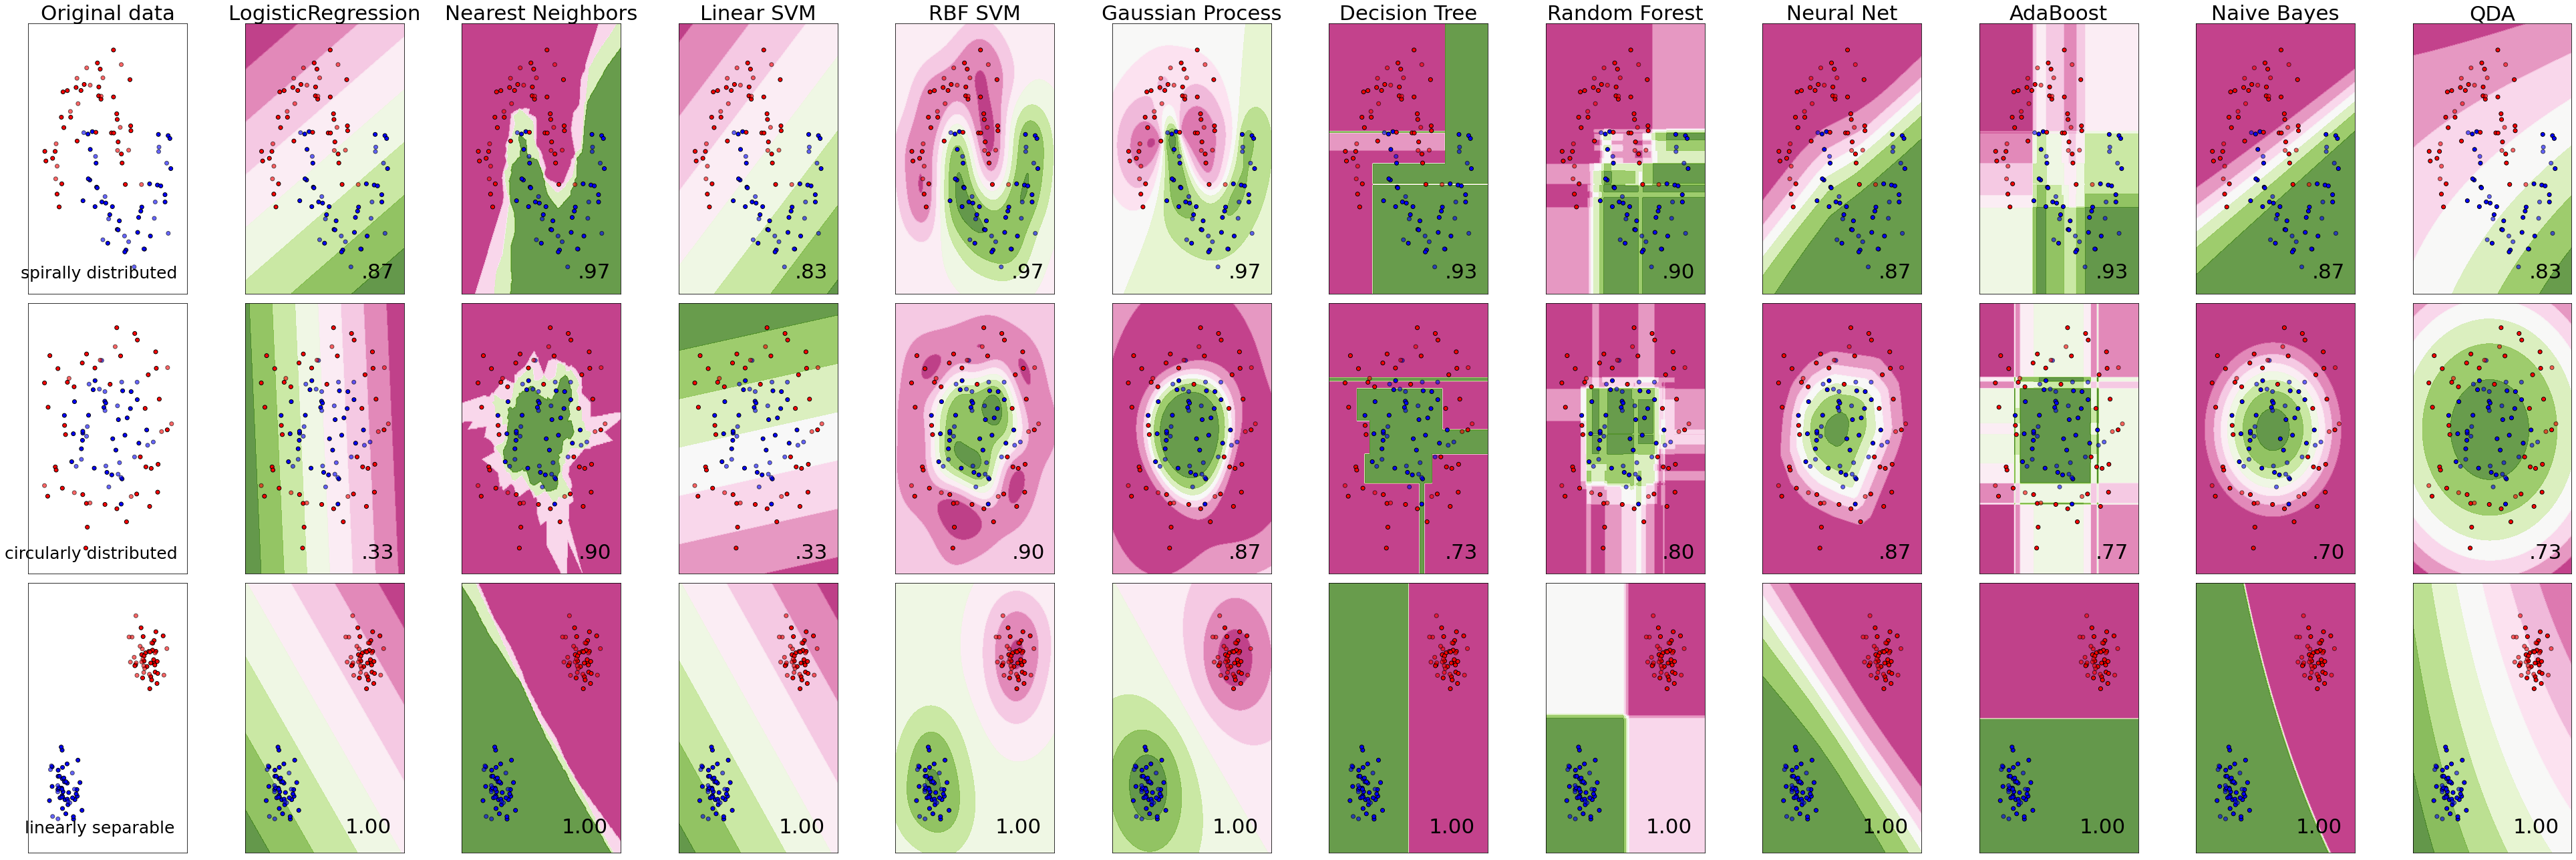

In [3]:
print("ROC Curve on Validation Dataset with AUC score")

figure = plt.figure(figsize=(54, 18))
h = .02  # step size in the mesh
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.3, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # plot the dataset first
    cm = plt.cm.PiYG
    cm_bright = ListedColormap(['r','b'])
    
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Original data", fontsize=31)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    
    # legends for original datasets
    if ds_cnt == 0:
        ax.text(xx.max() - .3, yy.min() + .3, "spirally distributed",
                    size=15, horizontalalignment='right', fontsize=25)
    elif ds_cnt == 1:
        ax.text(xx.max() - .3, yy.min() + .3, "circularly distributed",
                size=15, horizontalalignment='right', fontsize=25)
    else:
        ax.text(xx.max() - .3, yy.min() + .3, "linearly separable",
                size=15, horizontalalignment='right', fontsize=25)
        
    i += 1
    
    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

        if hasattr(clf, "decision_function"):
            y_scores = cross_val_predict(clf, X_train, y_train, cv=10, method="decision_function")
        else:
            y_scores = cross_val_predict(clf, X_train, y_train, cv=10, method="predict_proba")
            y_scores = y_scores[:, -1] # proba of positive class
        
        fpr, tpr, _ = roc_curve(y_train, y_scores)

        ax.plot(fpr, tpr, linewidth=2, label="AUC: {:.2f}".format(auc(fpr,tpr)).lstrip('0'))
        ax.plot([0,1],[0,1],'k--')
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)
        ax.set_xticks(())
        ax.set_yticks(())
        ax.legend(loc="lower right", fontsize=21)
        if ds_cnt == 0:
            ax.set_title(name, fontsize=31)
        i += 1    

plt.tight_layout()
plt.savefig("roc_curve_classifier_comparison.png", bbox_inches='tight')
plt.show()
        
print("Decision Boundaries on Testing dataset with their scores.")
figure = plt.figure(figsize=(54, 18))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.3, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # plot the dataset first
    cm = plt.cm.PiYG
    cm_bright = ListedColormap(['r','b'])
    
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Original data", fontsize=31)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    
    # legends for original datasets 
    if ds_cnt == 0:
        ax.text(xx.max() - .3, yy.min() + .3, "spirally distributed",
                    size=15, horizontalalignment='right', fontsize=25)
    elif ds_cnt == 1:
        ax.text(xx.max() - .3, yy.min() + .3, "circularly distributed",
                size=15, horizontalalignment='right', fontsize=25)
    else:
        ax.text(xx.max() - .3, yy.min() + .3, "linearly separable",
                size=15, horizontalalignment='right', fontsize=25)
    i += 1
    
    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name, fontsize=31)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right', fontsize=31)
        i += 1    

plt.tight_layout()
plt.savefig("decision_boundaries_classifier_comparison.png", bbox_inches='tight')
plt.show()